/tmp/ipykernel_1442757/2572230166.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
stockholm_folder = "/scr/aldea/skibinski/at_mtw/tbfv_stk"
stockholm_files = os.listdir(stockholm_folder)
stockholm_files = [stockholm_folder + "/" + file for file in stockholm_files]


In [3]:

def read_stockholm(file_name):
    with open(file_name, "r") as f:
        file_data = f.read()
    
    file_data = file_data.split("\n")
    seq = [line.split(" ") for line in file_data if re.match("\w",line)]
    seq = [[e for e in line if e] for line in seq]
    return seq

In [4]:
def calculate_gc_content(string):
    string = string.lower()
    gc_content = (string.count("g") + string.count("c")) / (string.count("g") + string.count("c") + string.count("a") + string.count("u"))
    return gc_content

In [5]:
data_for_df = []
names = []
for file in stockholm_files:
    name = file[37:48]
    if name[-1] == ".":
        name = name[:-1]
    names.append(names)
    if '1' in name:
        xrRNA = 1
    else:
        xrRNA = 2
    for id, seq in read_stockholm(file):
        data_for_df.append([id, seq, len(seq), calculate_gc_content(seq), xrRNA, name])

df_stats = pd.DataFrame(data_for_df, columns=['id', 'seq', 'len', 'gc', 'xrRNA', 'name'])
print(len(df_stats))
print(f"GC mean: {df_stats['gc'].mean()}")
print(f"length mean: {df_stats['len'].mean()}")

327
GC mean: 0.5930832287118337
length mean: 101.72782874617737


In [8]:
df = df_stats.drop_duplicates('name')
df1 = df[df["xrRNA"] == 1]
df2 = df[df["xrRNA"] == 2]
df1['len'].describe()

count     16.000000
mean      94.187500
std       10.790235
min       64.000000
25%       92.750000
50%       98.000000
75%       99.750000
max      104.000000
Name: len, dtype: float64

In [9]:
df1

,id,seq,len,gc,xrRNA,name
0,ALKV_JF416965.1:77-171,gccccaacgacgaacuguggcagcacaccauuuggugacgggaaac...,94,0.585106,1,ALKV_xrRNA1
2,LGTV_OP037822.1:111-213,acaagaaaaauggugggaugcggcaacgcacgaggcucgugacggg...,102,0.578431,1,LGTV_xrRNA1
6,LIV_MK007540.1:37-135,aagguaaccauggaaugaugcggcagcgcgcgacagcgacggggaa...,98,0.612245,1,LIV_xrRNA1
39,POWV_OP037817.1:27-131,cccuaacacaggggaugguguggcagcgcacaacgacaucgugacg...,104,0.596154,1,POWV_xrRNA1
109,OHFV_MT354626.1:245-344,uaacgaaucaugggaauggagcggcagcgcacgagagugacgggga...,99,0.606061,1,OHFV_xrRNA1
225,MG243699.1:10392-10491,cuaggggaucauggagugaugcggcagcgcgcgauagcgacgggga...,99,0.616162,1,TBEV_xrRNA1
290,DTV_OP037825.1:27-129,acccacuacagggggugauguggcagcgcaccacgacaucgugacg...,102,0.588235,1,DTV_xrRNA1
294,GGV_MN830233.1:2-106,ccuaaaaaucugagacuuguguggcagcgcacuaacggugugacgg...,104,0.557692,1,GGV_xrRNA1
298,KFDV_MG720087.1:75-170,agccccaacgacgaacuguggcagcacaccauuuggugacgggaag...,95,0.568421,1,KFDV_xrRNA1
302,KSIV_AY863002.1:2-101,ccacaauugaggggcacacuggcaacacaccauuggugacgggaau...,99,0.555556,1,KSIV_xrRNA1


In [49]:
print(f"length mean: {df_stats['len'].describe()}")

length mean: count    327.000000
mean     101.727829
std        6.927932
min       64.000000
25%       99.000000
50%      100.000000
75%      108.000000
max      108.000000
Name: len, dtype: float64


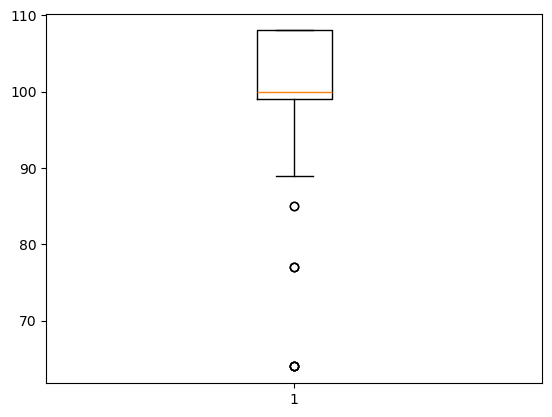

In [50]:
plt.boxplot(df_stats['len'])
plt.show()

In [51]:
grouped = df_stats.groupby('name')

NameError: name 'df_gc' is not defined

In [ ]:
gc_means = {}
for group_name, group in grouped:
    gc_means[group_name] = group['gc'].mean()
    print(group_name, len(group))
gc_means


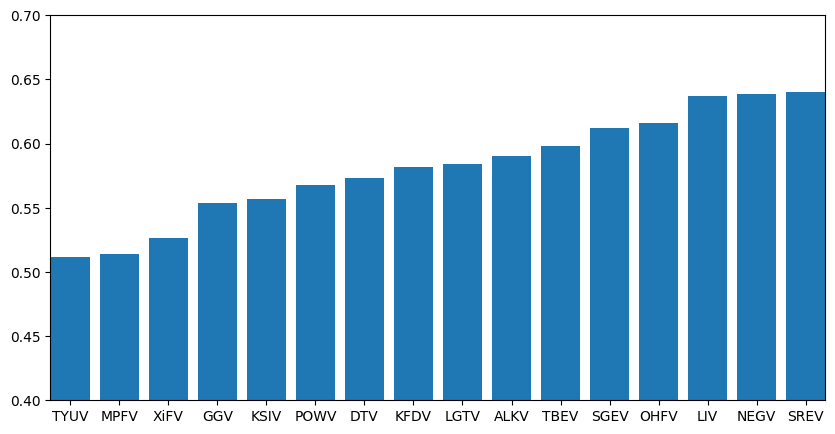

In [ ]:
means_sorted = sorted(gc_means.items(), key=lambda x:x[1])
means_sorted = dict(means_sorted)
plt.bar(*zip(*means_sorted.items()))
plt.ylim(0.4, 0.7)
plt.margins(0.0002)
#plt.hlines(0.5, -1, 16, color='r')
plt.show()

01.02.2024 - RNA design 

In [ ]:
statistic_file = 'TBFV_analysis_denis/TBFV_statistics.csv'
statistic_pars_file = 'TBFV_analysis_denis/TBFV_statistics_pairs.csv'

In [ ]:

import pandas as pd

csv_data = pd.read_csv(statistic_file)
csv_data = csv_data.set_index('attribute')
csv_data = csv_data.transpose()
csv_data.describe()

attribute,stem a,interior loop,stem b,hairpin loop b,stem c,hairpin loop c,nt_until_pk
count,23.000000,23.0,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.130435,6.0,3.913043,5.521739,4.695652,10.434783,14.521739
std,1.358621,0.0,1.164359,2.107768,0.764840,1.804693,2.371604
min,8.000000,6.0,2.000000,3.000000,4.000000,4.000000,9.000000
25%,11.500000,6.0,3.000000,4.000000,4.000000,10.000000,13.000000
50%,12.000000,6.0,4.000000,4.000000,5.000000,10.000000,15.000000
75%,13.000000,6.0,5.000000,7.000000,5.000000,12.000000,16.000000
max,15.000000,6.0,7.000000,9.000000,7.000000,13.000000,20.000000


02.02.2024 how many seqs?

In [4]:
path_xrRNA = '/home/mescalin/skibinski/xrRNA-RS-Denis'
folders = ["02_TBFV",'03_NKV','04_ISFV','05_MBFV' ]
strains = ["TBFV",'NKV','ISFV','MBFV' ]


In [ ]:
import os
stk_folder = '/scr/aldea/kgutenbrunner/data/tbfv_stk'
stk_files = os.listdir(stk_folder)
stk_files = [stk_folder + "/" + file for file in stk_files]

ids = []
for stk_file in stk_files:
    with open(stk_file, 'r') as f:
        file_data = f.read().split("\n")
        seqs = [line.split(" ")[0] for line in file_data if not line.startswith("#") and line and line != '//']
        ids += seqs
print(ids)
print(len(ids))


12.02.2024

In [7]:
def read_stockholm(file_name):
    with open(file_name, "r") as f:
        file_data = f.read()
    
    file_data = file_data.split("\n")
    seq = [line.split(" ") for line in file_data if re.match("\w",line)]
    ss_cons = [line.split(" ")[-1] for line in file_data if line.startswith("#=GC SS_cons")]
    seq = [[e for e in line if e] for line in seq]
    return seq, ss_cons

def calculate_gc_content(string):
    string = string.lower()
    gc_content = (string.count("g") + string.count("c")) / (string.count("g") + string.count("c") + string.count("a") + string.count("u"))
    return gc_content

In [8]:
import os
import re
import pandas as pd

stk_folder = '../data/tbfv_stk'
stk_files = os.listdir(stk_folder)
stk_files = [stk_folder + "/" + file for file in stk_files]

data_for_df = []
names = []
for file in stk_files:
    name = file[17:20]
    if name[-1] == "_":
        name = name[0:3]
    names.append(names)
    seqs,ss_cons =  read_stockholm(file)
    for id, seq in seqs:
        data_for_df.append([id, seq, len(seq), ss_cons[0], calculate_gc_content(seq), name])

df_stats = pd.DataFrame(data_for_df, columns=['id', 'seq', 'len', 'consens structure', 'gc', 'name'])
print(len(df_stats))
print(f"GC mean: {df_stats['gc'].mean()}")
print(f"length mean: {df_stats['len'].mean()}")


327
GC mean: 0.5930832287118337
length mean: 101.72782874617737


In [9]:
import Levenshtein
base_structure =    "(((((((((((......((((((.......)))))).((((((............)))))).)))))))))))....................."
#pseudoknot1 =       ".................(((..........................................................................................)))......"
#pseudoknot2 =       "............................................................((((...................................................))))"
iupac_seq =         "NNNNNNNXXXXXXGGCAGCRCRCXXXXNNNXXXXXXXXXXGYGACGGGXXXXXXXXXXXXGGUCXXXXXXXXXXXXCCCGACXXXXXXNNNNNNNNNXXXXXXXXXXXUUYGUGAGACC"
#iupac_seq =        'NNNNNNNXXXXXXNNNNNNNNNNXXXXNNNXXXXXXXXXXNNNNNNNNXXXXXXXXXXXXNNNNXXXXXXXXXXXXNNNNNNXXXXXXNNNNNNNNNXXXXXXXXXXXNNNNNNNNNNN'
#Numbers            "01234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678"
#Numbers            "0         1         2         3         4         5         6         7         8         9         10        11       "

ss_cons = df_stats['consens structure']

In [16]:
#distance = Levenshtein.distance(base_structure, ss_cons[0])

best_dist = 100
best_d_ss = None
best_sim = 0
best_ss = None
for ss in ss_cons:
    cur_sim = Levenshtein.ratio(base_structure, ss_cons[0])
    cur_dis = Levenshtein.distance(base_structure, ss_cons[0])
    if cur_sim > best_sim:
        best_sim = cur_sim
        best_ss = ss
    if cur_dis < best_dist:
        best_d_ss = ss
        best_dist = cur_dis

print(best_ss, best_sim)
print(best_d_ss, best_dist)


........((((((.((.((((......(((....))).((((............)))).)))).))))))))......................... 0.84375
........((((((.((.((((......(((....))).((((............)))).)))).))))))))......................... 29
